# Theory: Airy beam

In [1]:
# from beams package ./beams/test_airy.py
from test_airy import plot_airy, plot_airy_cubic, airy_numerical, plot_pupil_function

### References:

1. Siviloglou, G. A. & Christodoulides, D. N. Accelerating finite energy Airy beams. Opt. Lett., OL 32, 979–981 (2007).
2. Siviloglou, G. A., Broky, J., Dogariu, A. & Christodoulides, D. N. Observation of Accelerating Airy Beams. Phys. Rev. Lett. 99, 213901 (2007).
3. Niu, L. et al. Generation of One-Dimensional Terahertz Airy Beam by Three-Dimensional Printed Cubic-Phase Plate. IEEE Photonics Journal 9, 1–7 (2017).
4. Vettenburg, T. et al. Light-sheet microscopy using an Airy beam. Nat Meth 11, 541–544 (2014).





## The Airy beam

Folloing the work of Siviloglou et al. \[[1], [2]\].

The Airy beam is a solution to the paraxial equation of diffraction in 1D, and comes in the form:

$$
\Phi(\xi, s) = \textrm{Ai} (s-(\xi/2)^2) \exp (i(s\xi/2)-i(\xi^3/12)) \, ,
$$
where Ai is the Airy function, $s=x/x_0$, $\xi = z/kx_0^2$, $k=2\pi n/\lambda_0$, $x_0$ is a dimensionless coordinate.


Such an Airy beam is 'non-diffracting', however, has infinite energy.

A finite energy version can be realised by constraining the intensity in the cross-section by an exponent $\exp(\alpha s)$, resulting in the following form:

$$
\Phi(\xi, s) = \textrm{Ai} (s-(\xi/2)^2+i \alpha \xi) 
\exp (\alpha s - \alpha\xi^2/2 - i\xi^3/12 + i\alpha^2 \xi/2 + i s \xi/2) \, .
$$
note that $\alpha$ here is not the alpha set by the cubic mask.

An example of an Airy beam is given below, where $\alpha=0.1$, $x0=1e-6$, $\lambda_0=488e-9$

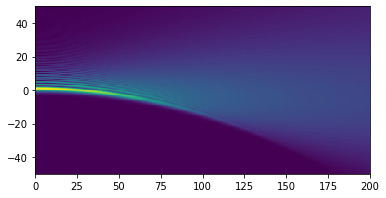

In [2]:
plot_airy()

***The question is, how does this relate to the cubic phase mask in the pupil plane and the focussing parameters set by the NA?***

## Airy equivalence in the pupil plane

From Fourier optics, we know that for an ideal lens, the pupil plane relates to the image plane via:

$$
E(x_2,y_2) = \textrm{FT}\{E(x_1, y_1)\}, \, \textrm{at} \, (u = \frac{x_2}{\lambda f}, v=\frac{y_2}{\lambda f})
$$
where $f$ is the focal length

At the focal plane, $\xi=0$, $\Phi(s) = \textrm{Ai} (s) 
\exp (\alpha s)$. Taking the fourier transform (matlab symbolic) yeilds \[[1]\]:
$$
E(s_2) = \exp(i/3(s_2+i\alpha)^3)
$$
$$
E(s_2) = \exp(\alpha^3/3-i\alpha^2 s_2 - \alpha s_2^2 + i s_2^3/3)
$$
$$
E(s_2) = \exp(-\alpha s_2^2) \exp(i s_2^3/3 - i\alpha^2 s_2 + \alpha^3/3)
$$

Notably, the first exponent is a Gaussian and the second is dominated by the cubic phase evolution with spatial coordinate. We can approximate this as:
$$
E(s_2) = \exp(-\alpha s_2^2) \exp(i s_2^3/3)
$$
or \[[3]\] (however here, we note that this is strictly an approximation)
$$
E(x_2) = \exp(-x_2^2/w_0^2) \exp(i \beta x_2^3)
$$
where $\alpha = w_0^{-2}(3\beta)^{-2/3}$ and $x_2 = (3\beta)^{-1/3} s_2$

Note, we evaluate at $s_2 = s/(\lambda f)$, so $x_2 = (3\beta)^{-1/3} s / (\lambda f )$ (*This will be useful for numerical solutions*)


**In an experiment**, we can create an Airy using a cubic phase mask in the pupil, with a phase given as:
$$
\phi(u_x, u_y) = \exp(i \beta (u_x^3 + u_y^3))
$$
or, in 1D
$$
\phi(u_x) = \exp(i \beta u_x^3)
$$

Note that in Vettenburgs publication \[[4]\] this is scaled by $\lambda$, i.e. $\phi = \exp( i \beta u_x^3 / \lambda )$ and is the 'correct' representation that yeild $\beta$ values on the order of 5-10. Let's define this as $\beta^\prime = \beta /\lambda$.

***Another note: for consistency with theory, this cubic phase factor is defined as $\beta$, and $\alpha$ is the exponential apodisation in the Airy equation.***

## Verification

We can see a clear equivalence between the cubic mask and the Fourier transform of the Airy beam. To bring this to a conclusion, we can observe the similarities between: 

1. the theoretical equations derived above, and summarised below
2. a numerical simulation of refocussing of a cubic phase mask

### 1
Let the pupil function be defined as a Gaussian envelope and a cubic phase:
$$
E(x_2) = \exp(-x_2^2/w_0^2) \exp(i \beta^\prime x_2^3 )
$$
where $\beta^\prime = \beta/\lambda$. Then, the field at the focus ($f$) becomes
$$
\Phi(x_1, z) = \textrm{Ai} (s-(\xi/2)^2+i \alpha \xi) 
\exp (\alpha s - \alpha\xi^2/2 - i\xi^3/12 + i\alpha^2 \xi/2 + i s \xi/2) \, .
$$
where:

\begin{align*}
\alpha &= w_0^{-2} (3\beta^\prime)^{-2/3} \\
x_0 &= \lambda f (3\beta^\prime)^{1/3} / (2\pi) \\
s &= x_1 / x_0 \\
\xi &= z / (k x_0^2)
\end{align*}


**NOTE**, the propagation invariance $\alpha$ is dependent only on the relationship of the Gaussian waist and the $\beta$ parameter, while the $f$ sets the 'scaling factor'. Also note, the $z$ scaling is the square of the lateral scaling as is the case of a Gaussian beam Rayleigh range with respect to beam waist.

### 2
We verify this numerically by taking the Fourier transform of $E(x_2)$, evaluated at $u = x_1/(\lambda f)$

```python
# let x1 be a zero-centred coordinate vector
pixPerM = 1/(x[1]-x[0]) # sampling frequency
x2 = np.linspace(pixPerM/2, -pixPerM/2, x.shape[0])
x2 = x2*lambda0*f

# if E2 is a function of x2, then E1 is a function of x1
E1 = np.fft.fftshift(np.fft.fft(E2))
```

### Results

We can see that the models are equivalent. Note, the numerical model has aliasing and precision errors



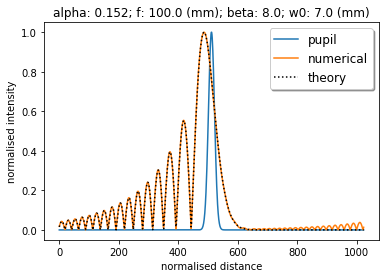

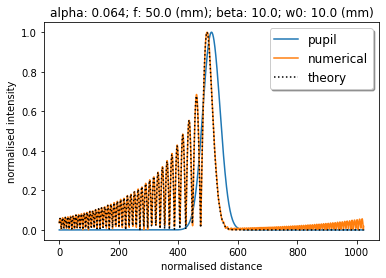

In [3]:
airy_numerical(beta = 8, f = 100e-3, w0 = 7e-3)
airy_numerical(beta = 10, f = 50e-3, w0 = 10e-3)

We can also look at the propagation of the Airy beam at focus with respect to the pupil function

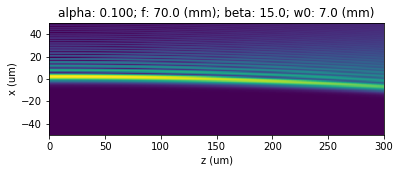

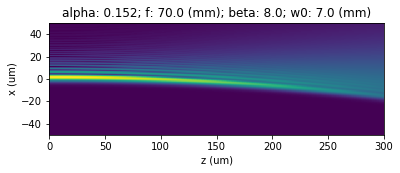

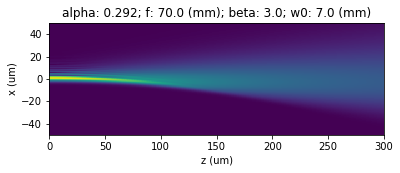

In [4]:
plot_airy_cubic(beta = 15, f = 70e-3, w0 = 7e-3)
plot_airy_cubic(beta = 8, f = 70e-3, w0 = 7e-3)
plot_airy_cubic(beta = 3, f = 70e-3, w0 = 7e-3)

## Scale invariant representation

Let's consider a new representation of the pupil plane, where $\beta$ is scaled by the $\omega_0$ parameter, to provide a more intuitive and scale invariant form.

Let
$$
E(x_2) = \exp(-x_2^2/\omega_0^2) \exp(i (2\pi\gamma/\omega_0^3) x_2^3)
$$
where $\gamma$ indicates the number of phase wraps at $\omega_0$.

Note, in different implementations this may be referenced to the 1/e^2, FWHM, radius, etc; thus, this process has to be repeated for each case. This isn't a simple scaling, since we are referencing to a cubed value.

Thus
$$
\beta^\prime = 2\pi\gamma/\omega_0^3
$$
and
$$
\alpha = 1 / (6\pi\gamma)^{2/3}
$$
Note, this form makes $\alpha$ agnostic of $\omega_0$.
Similarly
$$
x_0 = \lambda f (6\pi\gamma)^{1/3}/ (2\pi\omega_0 )
$$


## Scale invariant representation (HWHM)

Let's create a representation referenced to the HWHM. 
Here, $\omega_0 = \sqrt{2}\sigma$.
Thus, $r_0 = \omega_0\sqrt{\ln 2}$

Let
$$
E(x_2) = \exp(-x_2^2/\omega_0^2) \exp(i (2\pi\gamma/r_0^3) x_2^3)
$$
where $\gamma$ indicates the number of phase wraps at $r_0$.

Thus
$$
\beta^\prime = 2\pi\gamma/(\omega_0\sqrt{\ln 2})^3
$$
and
$$
\alpha = \ln 2 / (6\pi\gamma)^{2/3}
$$
Note, this form makes $\alpha$ agnostic of $\omega_0$.
Similarly
$$
x_0 = \lambda f (6\pi\gamma)^{1/3} / (2\pi\omega_0\sqrt{\ln 2})
$$